In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [80]:
sns.set_theme()
pd.set_option('display.max_columns', None)
PATH_TO_DATASET = './MBD'

In [81]:
transactions = pd.read_parquet(path=os.path.join(PATH_TO_DATASET, 'detail/trx/fold=0'))

In [82]:
print(transactions.shape)
transactions.head()

(7634228, 14)


,client_id,event_time,amount,event_type,event_subtype,currency,src_type11,src_type12,dst_type11,dst_type12,src_type21,src_type22,src_type31,src_type32
0,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-26 13:58:59.938408,1.021543e+06,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0
1,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2021-02-09 07:43:20.639579,3.007656e+05,1,12,11.0,4.0,958.0,306.0,26766.0,21490.0,83.0,364.0,58.0
2,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-22 09:12:06.614108,6.061549e+05,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0
3,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2021-02-12 15:12:20.660481,8.032591e+04,1,12,11.0,4.0,958.0,306.0,26766.0,21490.0,83.0,364.0,58.0
4,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-08 06:52:28.877461,1.222866e+05,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0


In [83]:
transactions.isna().sum(axis=0)

client_id            0
event_time           0
amount               0
event_type           0
event_subtype        0
currency            36
src_type11       45463
src_type12       45463
dst_type11       54202
dst_type12       54202
src_type21        8029
src_type22        8029
src_type31       16159
src_type32       16159
dtype: int64

In [84]:
transactions[transactions['currency'].isna()].head()

,client_id,event_time,amount,event_type,event_subtype,currency,src_type11,src_type12,dst_type11,dst_type12,src_type21,src_type22,src_type31,src_type32
839533,a3d98b0dbaf42df88da1d549f6778657c9b8e030e71c92...,2022-05-30 19:33:24.106579,8387.082031,17,6,NaN,22.0,47.0,168.0,19698.0,42379.0,74.0,1641.0,19.0
839534,a3d98b0dbaf42df88da1d549f6778657c9b8e030e71c92...,2022-03-18 19:04:45.817549,8809.521484,39,26,NaN,105.0,709.0,168.0,2850.0,42379.0,74.0,1641.0,19.0
926219,fd48978d1a1bd132b1195168e4b5d0c0ce2e29a01fb931...,2021-06-24 10:37:59.055992,65830.117188,48,6,NaN,22.0,47.0,230.0,3266.0,47519.0,8.0,322.0,47.0
926220,fd48978d1a1bd132b1195168e4b5d0c0ce2e29a01fb931...,2022-10-23 10:39:41.430274,48612.445312,48,6,NaN,22.0,47.0,230.0,3266.0,47519.0,8.0,322.0,47.0
926221,fd48978d1a1bd132b1195168e4b5d0c0ce2e29a01fb931...,2022-01-29 12:26:28.966003,128496.023438,48,6,NaN,22.0,47.0,230.0,3266.0,47519.0,8.0,322.0,47.0


In [85]:
transactions.dtypes

client_id                object
event_time       datetime64[ns]
amount                  float32
event_type                int32
event_subtype             int32
currency                float64
src_type11              float64
src_type12              float64
dst_type11              float64
dst_type12              float64
src_type21              float64
src_type22              float64
src_type31              float64
src_type32              float64
dtype: object

In [86]:
transactions[['event_type', 'event_subtype']].nunique()

event_type       53
event_subtype    59
dtype: int64

In [87]:
transactions = transactions.astype(
    dtype={
        'event_type' : 'category', 
        'event_subtype' : 'category', 
        'currency' : 'category', 
        'src_type11' : 'category', 
        'src_type12' : 'category', 
        'dst_type11' : 'category', 
        'dst_type12' : 'category', 
        'src_type21' : 'category', 
        'src_type22' : 'category', 
        'src_type31' : 'category', 
        'src_type32' : 'category', 
    }, 
)

In [88]:
transactions.dtypes

client_id                object
event_time       datetime64[ns]
amount                  float32
event_type             category
event_subtype          category
currency               category
src_type11             category
src_type12             category
dst_type11             category
dst_type12             category
src_type21             category
src_type22             category
src_type31             category
src_type32             category
dtype: object

In [89]:
transactions[transactions['src_type11'].isna() | transactions['src_type12'].isna()].size - transactions[transactions['src_type11'].isna() & transactions['src_type12'].isna()].size

0

`src_type11` is NA $\iff$ `src_type12` is NA

In [90]:
transactions[transactions['dst_type11'].isna() & transactions['dst_type12'].isna()].size - transactions[transactions['dst_type11'].isna() | transactions['dst_type12'].isna()].size

0

`dst_type11` is NA $\iff$ `dst_type12` is NA

In [91]:
transactions[transactions['src_type21'].isna() & transactions['src_type22'].isna()].size - transactions[transactions['src_type21'].isna() | transactions['src_type22'].isna()].size

0

`src_type21` is NA $\iff$ `src_type22` is NA

In [92]:
transactions[transactions['src_type31'].isna() & transactions['src_type32'].isna()].size - transactions[transactions['src_type31'].isna() | transactions['src_type32'].isna()].size

0

`src_type31` is NA $\iff$ `src_type32` is NA

In [93]:
transactions.head()

,client_id,event_time,amount,event_type,event_subtype,currency,src_type11,src_type12,dst_type11,dst_type12,src_type21,src_type22,src_type31,src_type32
0,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-26 13:58:59.938408,1.021543e+06,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0
1,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2021-02-09 07:43:20.639579,3.007656e+05,1,12,11.0,4.0,958.0,306.0,26766.0,21490.0,83.0,364.0,58.0
2,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-22 09:12:06.614108,6.061549e+05,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0
3,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2021-02-12 15:12:20.660481,8.032591e+04,1,12,11.0,4.0,958.0,306.0,26766.0,21490.0,83.0,364.0,58.0
4,01a1aca1531e0d86b605759fedd36e1855f41a8a6a49b4...,2022-10-08 06:52:28.877461,1.222866e+05,16,18,11.0,22.0,47.0,780.0,21619.0,21490.0,83.0,364.0,58.0


In [94]:
count = transactions.groupby('client_id')['event_time'].count()
count.describe()

count     20032.000000
mean        381.101637
std        1357.369024
min           1.000000
25%          41.000000
50%         169.000000
75%         512.000000
max      169039.000000
Name: event_time, dtype: float64

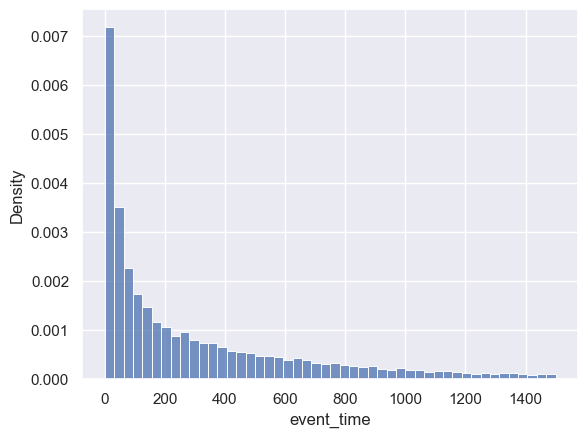

In [95]:
ax = sns.histplot(
    data=count, 
    stat='density', 
    binrange=(0, 1500), 
    # bins=100, 
)

On average clients had 381.10 transactions

In [100]:
transactions[(transactions['client_id'] == '00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c7882a9b48a9631d841') & (transactions['event_time'] <= '2022-01-31')]

,client_id,event_time,amount,event_type,event_subtype,currency,src_type11,src_type12,dst_type11,dst_type12,src_type21,src_type22,src_type31,src_type32
5955301,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-04-30 23:43:54.469254,440.707642,49,48,11.0,22.0,47.0,556.0,31980.0,28275.0,66.0,90.0,19.0
5955304,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-06-04 11:21:45.756578,2918.454590,49,48,11.0,22.0,47.0,556.0,31980.0,28275.0,66.0,90.0,19.0
5955305,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-06-29 11:10:28.874384,329.858063,49,48,11.0,22.0,47.0,556.0,31980.0,28275.0,66.0,90.0,19.0
5955306,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-04-07 16:27:24.137035,16606.066406,49,48,11.0,22.0,47.0,556.0,20859.0,28275.0,66.0,90.0,19.0
5955307,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-02-17 11:35:08.513409,14871.047852,49,48,11.0,22.0,47.0,556.0,31980.0,28275.0,66.0,90.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955888,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-01-15 08:58:38.220996,701.735291,50,19,11.0,22.0,47.0,712.0,3128.0,28275.0,66.0,90.0,19.0
5955889,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-03-15 21:43:24.707490,5742.270996,50,19,11.0,22.0,47.0,712.0,3128.0,28275.0,66.0,90.0,19.0
5955891,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-12-28 09:32:30.832575,32.533043,50,19,11.0,22.0,47.0,1569.0,7793.0,28275.0,66.0,90.0,19.0
5955892,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2021-08-21 14:10:26.907229,8267.679688,50,19,11.0,22.0,47.0,1569.0,7793.0,28275.0,66.0,90.0,19.0


In [101]:
transactions['event_time'].describe()

count                          7634228
mean     2022-01-06 06:06:45.856158720
min         2020-12-31 21:00:11.062887
25%      2021-07-06 18:29:05.728897536
50%      2022-01-02 08:07:45.843692800
75%      2022-07-10 16:12:07.381889536
max         2022-12-31 20:59:56.338108
Name: event_time, dtype: object